In [9]:
!pip install -r requirements.txt

  Using cached cycler-0.11.0-py3-none-any.whl.metadata (785 bytes)
  Using cached fonttools-4.29.1-py3-none-any.whl.metadata (119 kB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl.metadata (5.2 kB)
  Using cached kiwisolver-1.3.2.tar.gz (54 kB)
  Preparing metadata (setup.py) ... done
  Using cached matplotlib-3.5.1.tar.gz (35.3 MB)
  Preparing metadata (setup.py) ... done
  Using cached mlxtend-0.19.0-py2.py3-none-any.whl.metadata (1.6 kB)
  Using cached numpy-1.22.2.zip (11.4 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached packaging-21.3-py3-none-any.whl.metadata (15 kB)
  Using cached pandas-1.4.1.tar.gz (4.9 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Pillow-9.0.1.tar.gz (49.5 MB)
  Preparing metadata (setup.py) ... done
  Using cached pyparsing-3.0.7-py3-none-any.wh

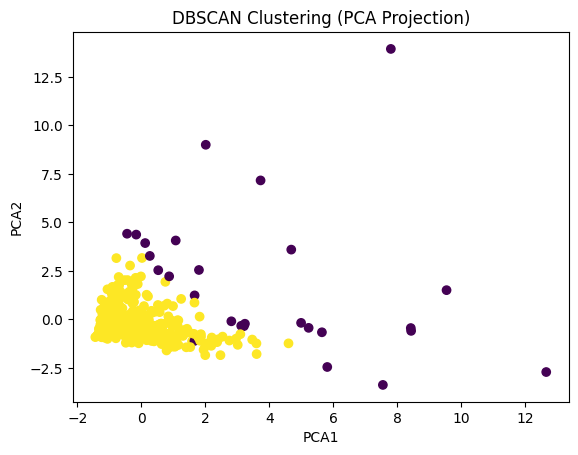

Number of clusters: 1
Number of noise points: 27


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score



# Load data
data = pd.read_csv('/content/Wholesale customers data.csv')
X = data.drop(['Channel', 'Region'], axis=1)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('DBSCAN Clustering (PCA Projection)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.savefig('dbscan_clusters.png')
plt.show()

# Print number of clusters and noise points
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)
print(f'Number of clusters: {n_clusters}')
print(f'Number of noise points: {n_noise}')

# Compute silhouette score (excluding noise points)
if n_clusters > 1:
    mask = clusters != -1
    score = silhouette_score(X_scaled[mask], clusters[mask])
    print(f'Silhouette Score (excluding noise): {score}')